## Workshop 003

Luis Angel Garcia (2230177)

## libraries

In [65]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, HuberRegressor
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

## Route and load of csv

Año: 2015 - Filas: 158, Columnas: 12
Año: 2016 - Filas: 157, Columnas: 13
Año: 2017 - Filas: 155, Columnas: 12
Año: 2018 - Filas: 156, Columnas: 9
Año: 2019 - Filas: 156, Columnas: 9

Columnas en 2015:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Columnas en 2016:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Columnas en 2017:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

Columnas en 2018:
['Overall rank', 'Country or reg

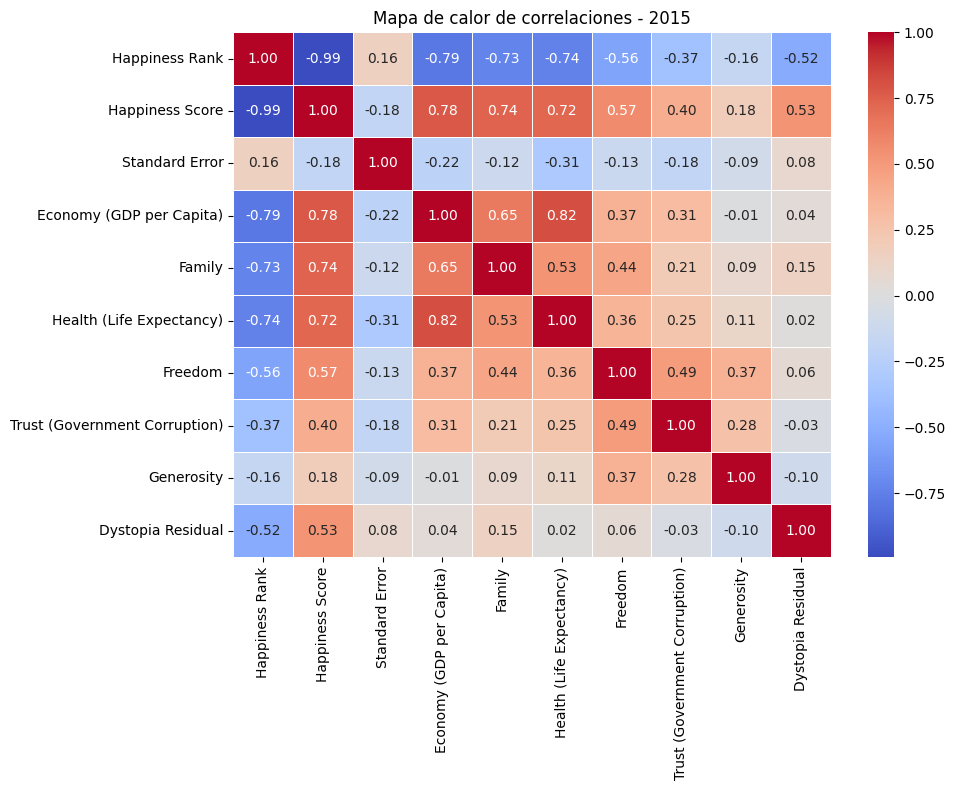


Columnas en 2016:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


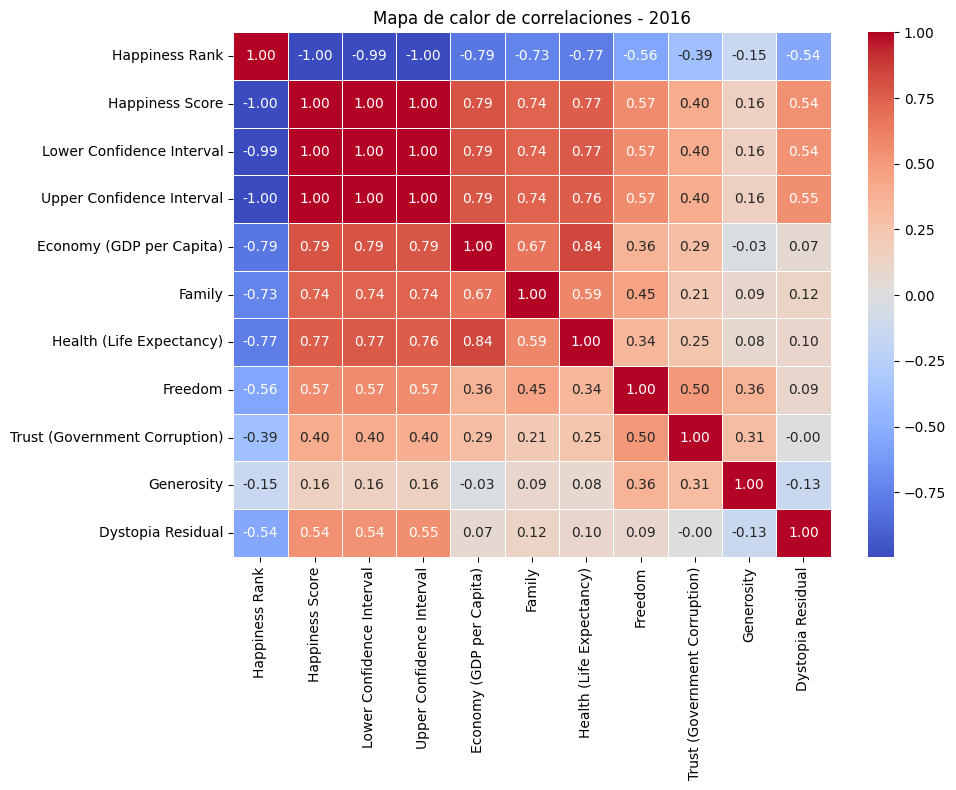


Columnas en 2017:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']


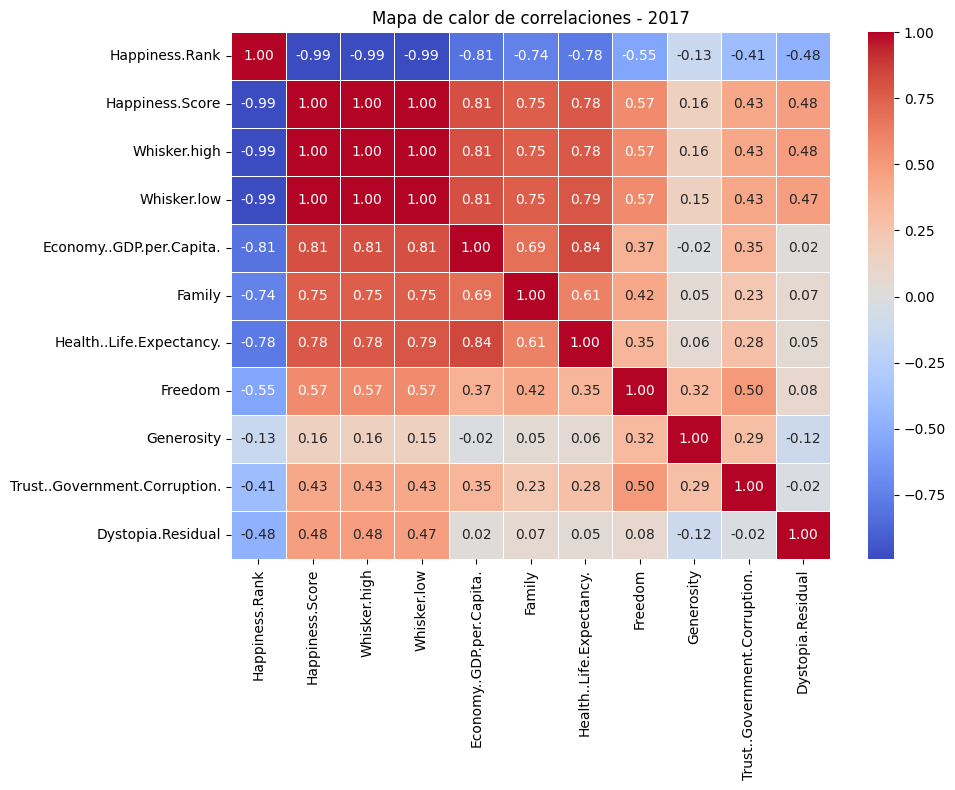


Columnas en 2018:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


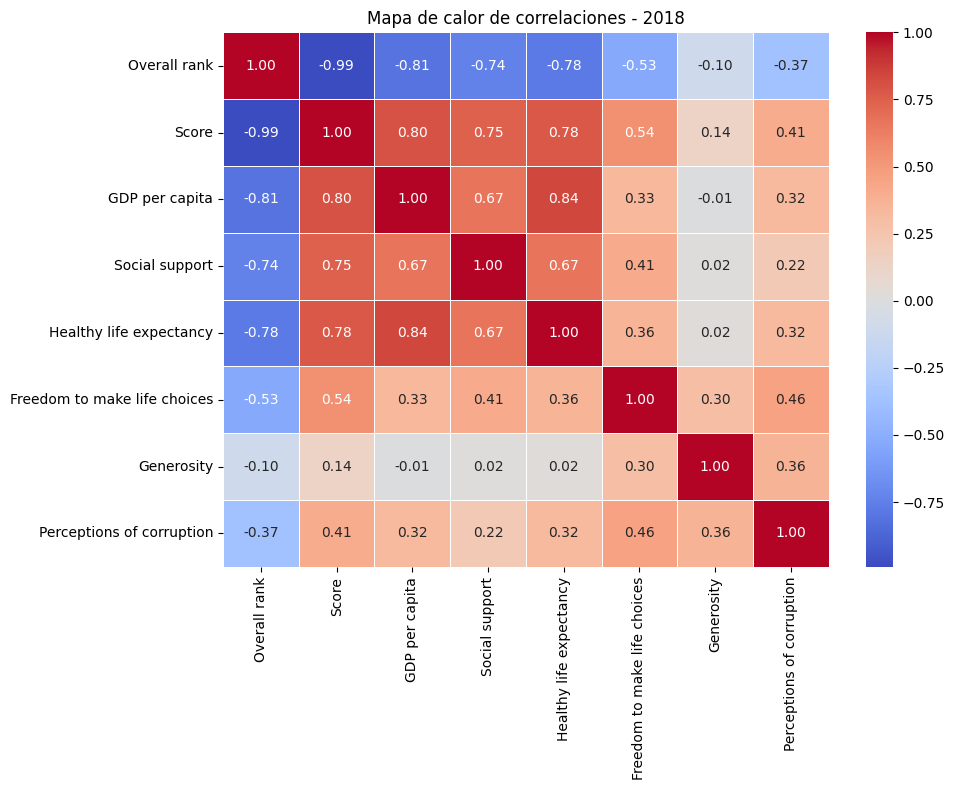


Columnas en 2019:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


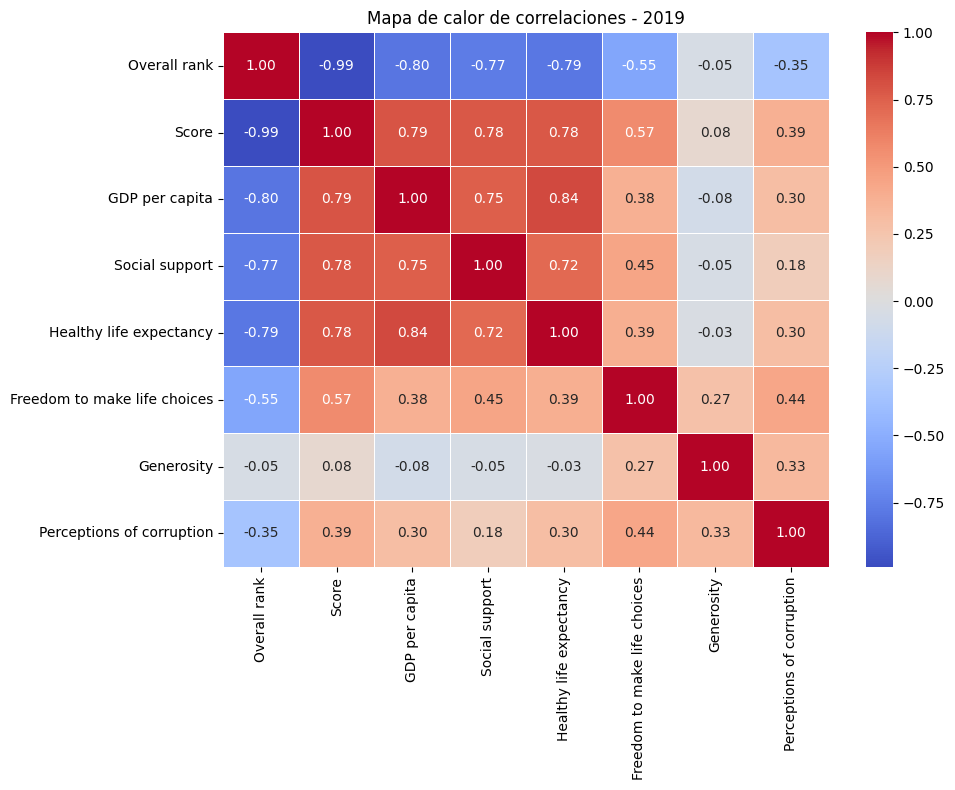

In [66]:
data_path = "../data"
files = ["2015.csv", "2016.csv", "2017.csv", "2018.csv", "2019.csv"]

dfs = {}
for file in files:
    year = file.split(".")[0]
    df = pd.read_csv(os.path.join(data_path, file))
    dfs[year] = df
    print(f"Año: {year} - Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

for year, df in dfs.items():
    print(f"\nColumnas en {year}:")
    print(df.columns.tolist())

# Gráficas de distribución
for year, df in dfs.items():
    print(f"\nColumnas en {year}:")
    print(df.columns.tolist())

    # Seleccionar columnas numéricas
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Filtrar columnas que probablemente distorsionen la escala
    cols_to_exclude = ["Standard Error", "Lower Confidence Interval", "Upper Confidence Interval", "Happiness Rank", "Happiness.Rank", "Whisker.high", "Whisker.low"]
    numeric_filtered = [col for col in numeric_cols if col not in cols_to_exclude]

# Mostrar columnas y graficar heatmap por año
for year, df in dfs.items():
    print(f"\nColumnas en {year}:")
    print(df.columns.tolist())

    # Seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calcular matriz de correlación
    corr = numeric_df.corr()

    # Graficar mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Mapa de calor de correlaciones - {year}")
    plt.tight_layout()
    plt.show()

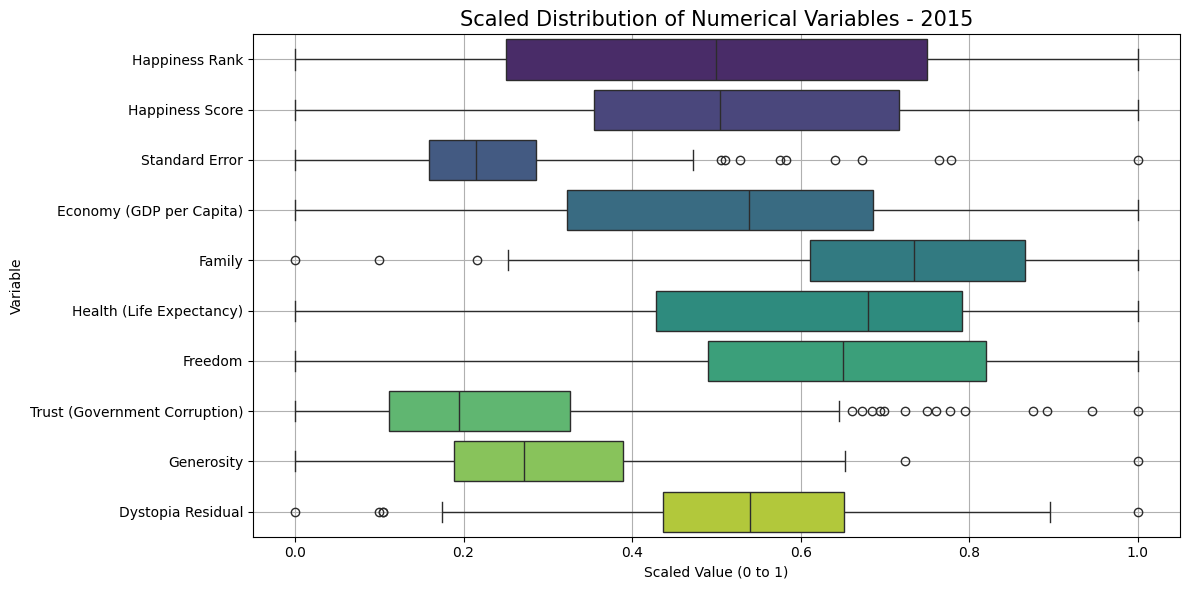

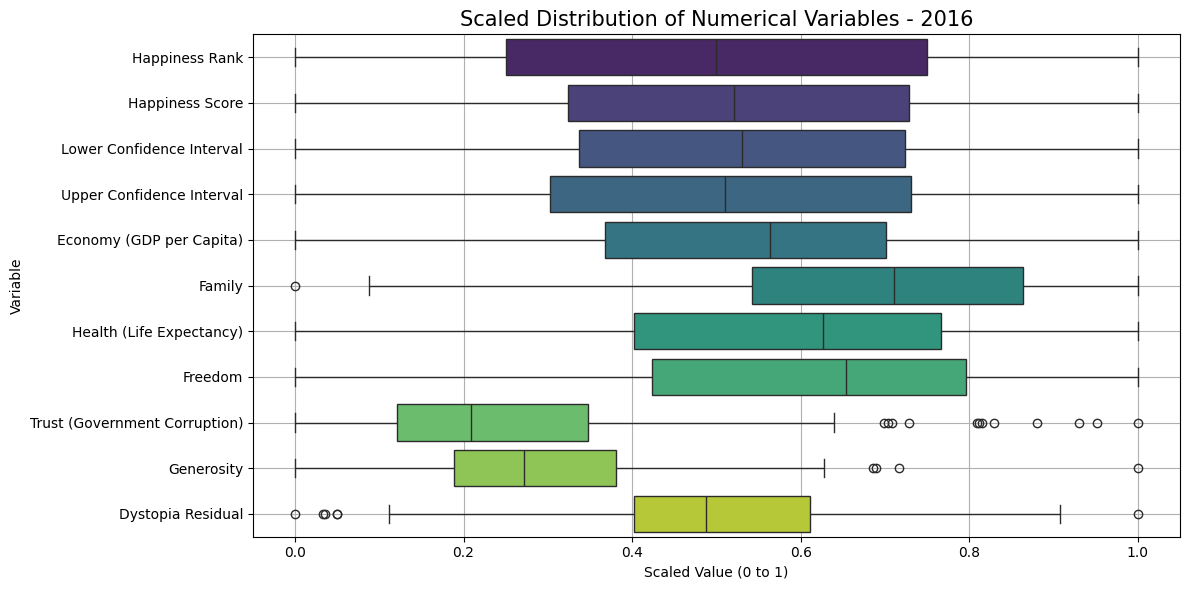

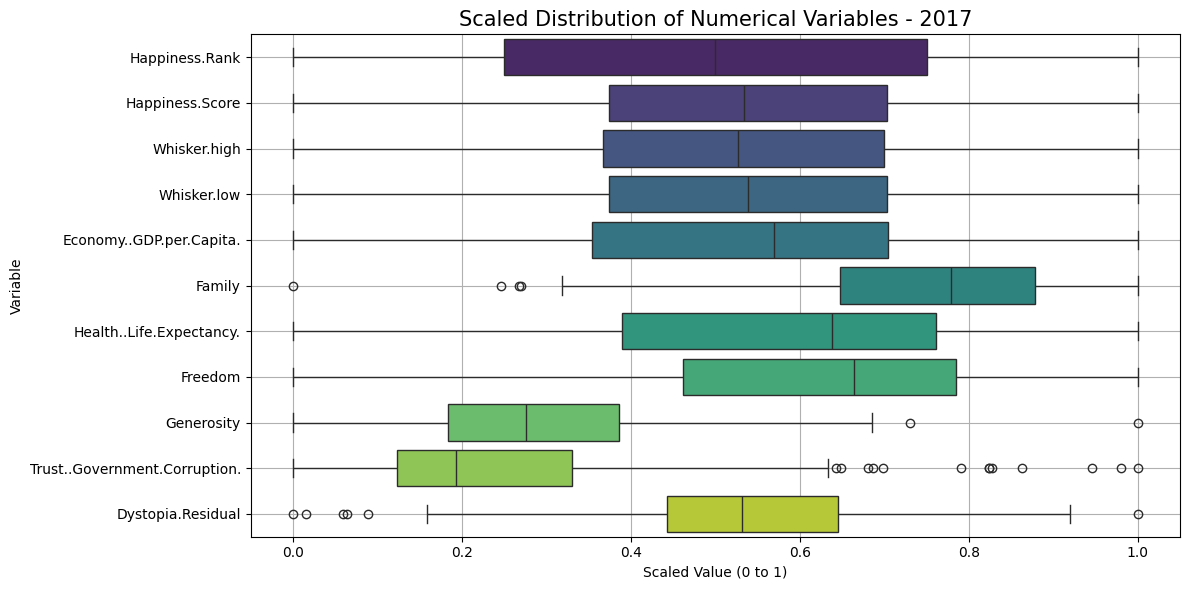

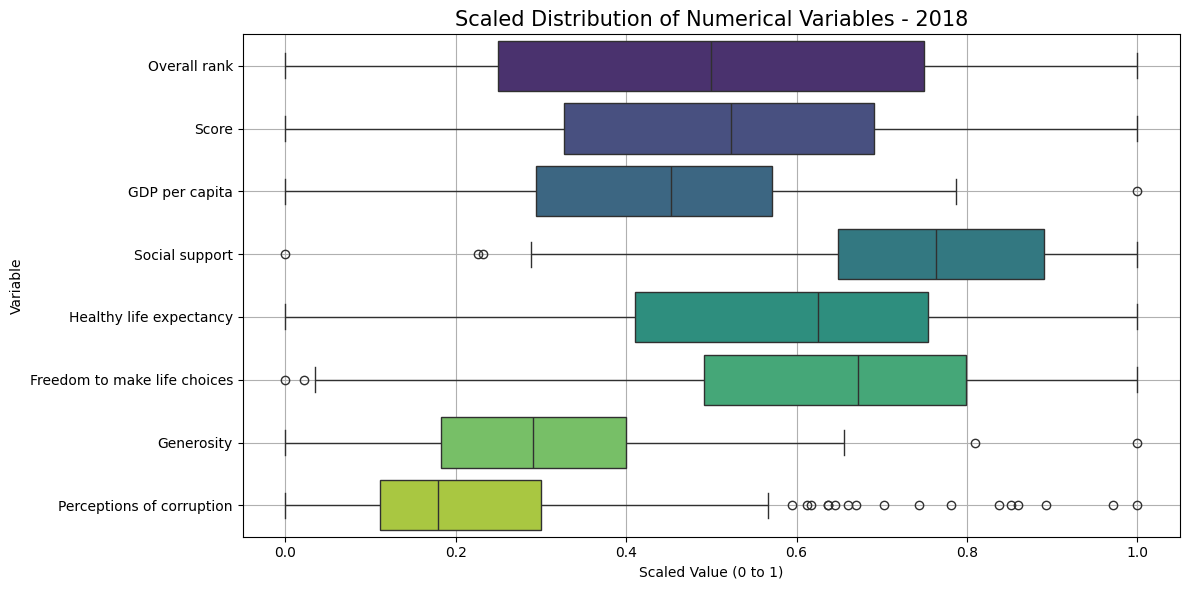

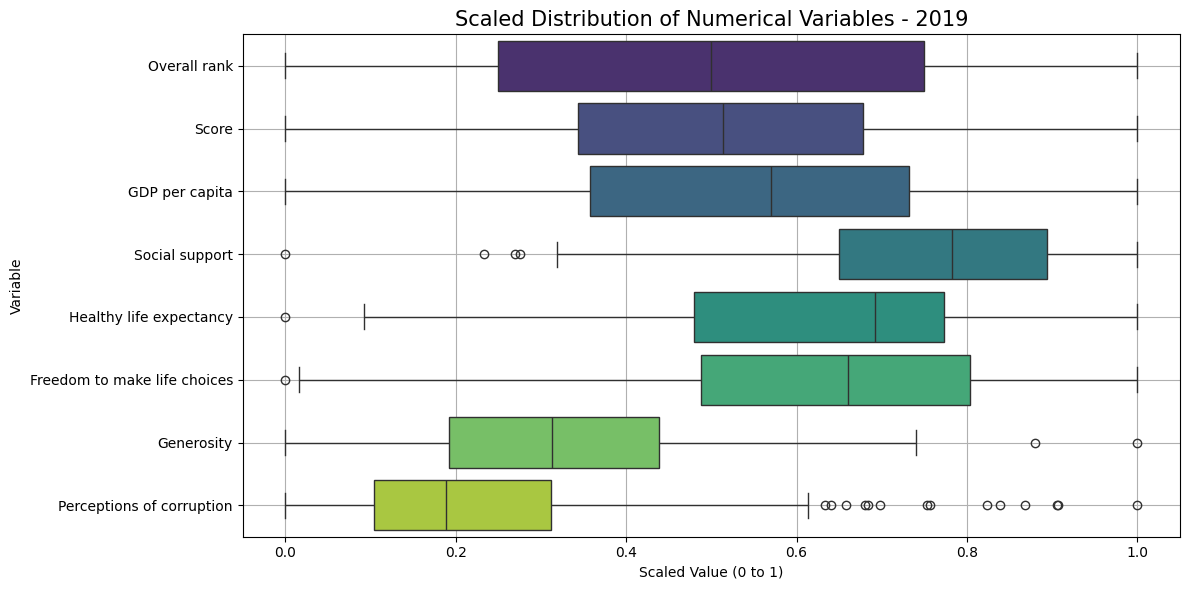

In [67]:
from sklearn.preprocessing import MinMaxScaler

for file in files:
    year = file.split(".")[0]
    df = pd.read_csv(os.path.join(data_path, file))
    numeric_cols = df.select_dtypes(include='number').columns.tolist()

    # Escalado
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

    # Boxplot escalado
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_scaled, orient='h', palette='viridis')
    plt.title(f'Scaled Distribution of Numerical Variables - {year}', fontsize=15)
    plt.xlabel("Scaled Value (0 to 1)")
    plt.ylabel("Variable")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## cleaning

In [68]:
def standardize_dataframe(df, year):
    year = int(year)
    
    if year == 2015:
        df = df.rename(columns={
            'Country': 'Country',
            'Region': 'Region',
            'Happiness Rank': 'Rank',
            'Happiness Score': 'Score',
            'Economy (GDP per Capita)': 'GDP',
            'Family': 'Social support',
            'Health (Life Expectancy)': 'Health',
            'Freedom': 'Freedom',
            'Trust (Government Corruption)': 'Trust',
            'Generosity': 'Generosity',
            'Dystopia Residual': 'Dystopia'
        })
        df['Year'] = year
        df = df[['Country', 'Region', 'Rank', 'Score', 'GDP', 'Social support', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia', 'Year']]

    elif year == 2016:
        df = df.rename(columns={
            'Country': 'Country',
            'Region': 'Region',
            'Happiness Rank': 'Rank',
            'Happiness Score': 'Score',
            'Economy (GDP per Capita)': 'GDP',
            'Family': 'Social support',
            'Health (Life Expectancy)': 'Health',
            'Freedom': 'Freedom',
            'Trust (Government Corruption)': 'Trust',
            'Generosity': 'Generosity',
            'Dystopia Residual': 'Dystopia'
        })
        df['Year'] = year
        df = df[['Country', 'Region', 'Rank', 'Score', 'GDP', 'Social support', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia', 'Year']]

    elif year == 2017:
        df = df.rename(columns={
            'Country': 'Country',
            'Happiness.Rank': 'Rank',
            'Happiness.Score': 'Score',
            'Economy..GDP.per.Capita.': 'GDP',
            'Family': 'Social support',
            'Health..Life.Expectancy.': 'Health',
            'Freedom': 'Freedom',
            'Trust..Government.Corruption.': 'Trust',
            'Generosity': 'Generosity',
            'Dystopia.Residual': 'Dystopia'
        })
        df['Region'] = None
        df['Year'] = year
        df = df[['Country', 'Region', 'Rank', 'Score', 'GDP', 'Social support', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia', 'Year']]

    elif year in [2018, 2019]:
        df = df.rename(columns={
            'Country or region': 'Country',
            'Overall rank': 'Rank',
            'Score': 'Score',
            'GDP per capita': 'GDP',
            'Social support': 'Social support',
            'Healthy life expectancy': 'Health',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Trust',
            'Generosity': 'Generosity'
        })
        df['Region'] = None
        df['Dystopia'] = None 
        df['Year'] = year
        df = df[['Country', 'Region', 'Rank', 'Score', 'GDP', 'Social support', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia', 'Year']]

    return df


## First review

In [69]:
dfs_cleaned = [standardize_dataframe(df, year) for year, df in dfs.items()]
df_all = pd.concat(dfs_cleaned, ignore_index=True)

print(df_all.info())
print(df_all.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         782 non-null    object 
 1   Region          315 non-null    object 
 2   Rank            782 non-null    int64  
 3   Score           782 non-null    float64
 4   GDP             782 non-null    float64
 5   Social support  782 non-null    float64
 6   Health          782 non-null    float64
 7   Freedom         782 non-null    float64
 8   Trust           781 non-null    float64
 9   Generosity      782 non-null    float64
 10  Dystopia        470 non-null    float64
 11  Year            782 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 73.4+ KB
None
Country             0
Region            467
Rank                0
Score               0
GDP                 0
Social support      0
Health              0
Freedom             0
Trust               1

/tmp/ipykernel_8769/3615305978.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(dfs_cleaned, ignore_index=True)


## Limpieza final

In [70]:
df_all = df_all.drop(columns=['Region'])

df_all['Trust'] = df_all['Trust'].fillna(df_all['Trust'].mean())

global_dystopia_mean = df_all['Dystopia'].mean()

df_all['Dystopia'] = df_all.groupby('Year')['Dystopia'].transform(
    lambda x: x.fillna(x.mean() if not pd.isna(x.mean()) else global_dystopia_mean)
)


## Second review

In [71]:
print(df_all.isnull().sum()) 
df_all.to_csv(os.path.join(data_path, "happiness_cleaned.csv"), index=False)

Country           0
Rank              0
Score             0
GDP               0
Social support    0
Health            0
Freedom           0
Trust             0
Generosity        0
Dystopia          0
Year              0
dtype: int64


## step 2: Regression model training

## Selection of predictor variables

In [72]:
X = df_all.drop(columns=['Country', 'Score'])
y = df_all['Score']

## Division of the data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data scaling

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training

In [75]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Testing model

In [76]:
y_pred = model.predict(X_test_scaled)
rmse = rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

joblib.dump(model, "../models/happiness_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

RMSE: 0.1307
R² Score: 0.9863
MAE: 0.0990
MSE: 0.0171


['../models/scaler.pkl']

In [77]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

huber_model = HuberRegressor()
huber_model.fit(X_train_scaled, y_train)
huber_pred = huber_model.predict(X_test_scaled)

def print_metrics(y_test, y_pred, model_name):
    print(f"\n {model_name} Metrics:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

print_metrics(y_test, y_pred, "Linear Regression")
print_metrics(y_test, ridge_pred, "Ridge Regression")
print_metrics(y_test, huber_pred, "Huber Regressor")

def regression_accuracy(y_true, y_pred, tolerance=0.3):
    correct = sum(abs(y_true - y_pred) <= tolerance)
    accuracy = correct / len(y_true)
    return round(accuracy * 100, 2)

print("\nModel Accuracy (±0.3 tolerance):")
print(f"Linear Regression: {regression_accuracy(y_test, y_pred)}%")
print(f"Ridge Regression: {regression_accuracy(y_test, ridge_pred)}%")
print(f"Huber Regressor: {regression_accuracy(y_test, huber_pred)}%")



 Linear Regression Metrics:
R² Score: 0.9863
RMSE: 0.1307
MAE: 0.0990
MSE: 0.0171

 Ridge Regression Metrics:
R² Score: 0.9862
RMSE: 0.1313
MAE: 0.0986
MSE: 0.0172

 Huber Regressor Metrics:
R² Score: 0.9859
RMSE: 0.1328
MAE: 0.0938
MSE: 0.0176

Model Accuracy (±0.3 tolerance):
Linear Regression: 97.02%
Ridge Regression: 97.02%
Huber Regressor: 96.6%


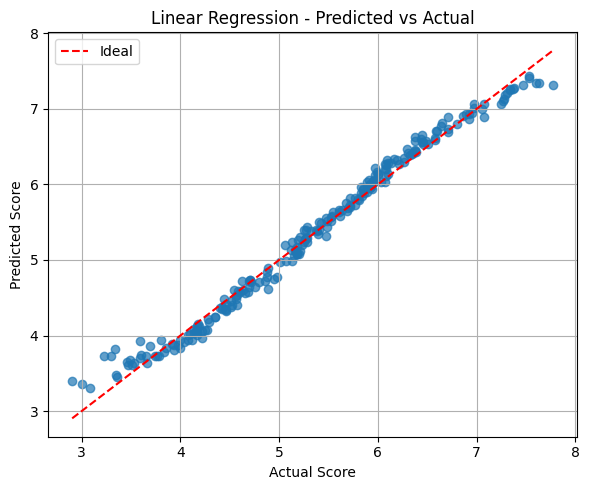

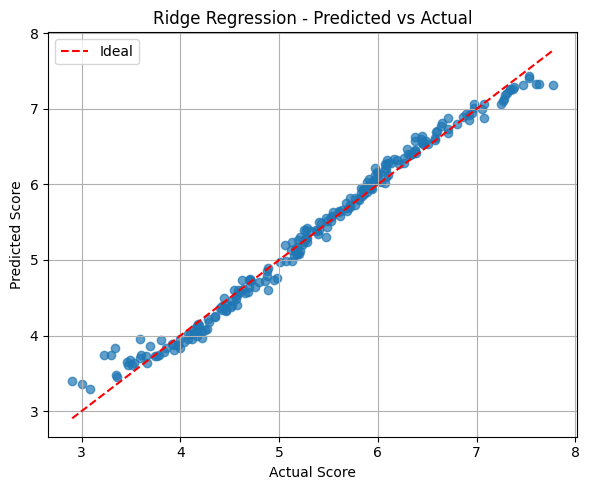

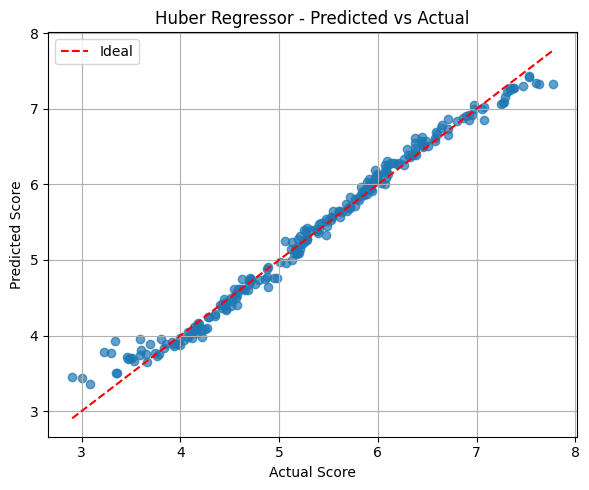

In [78]:
# Lista de predicciones y nombres de modelos
predictions = [
    (y_pred, "Linear Regression"),
    (ridge_pred, "Ridge Regression"),
    (huber_pred, "Huber Regressor")
]

# Generar una gráfica por modelo
for pred, name in predictions:
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal")
    plt.xlabel("Actual Score")
    plt.ylabel("Predicted Score")
    plt.title(f"{name} - Predicted vs Actual")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

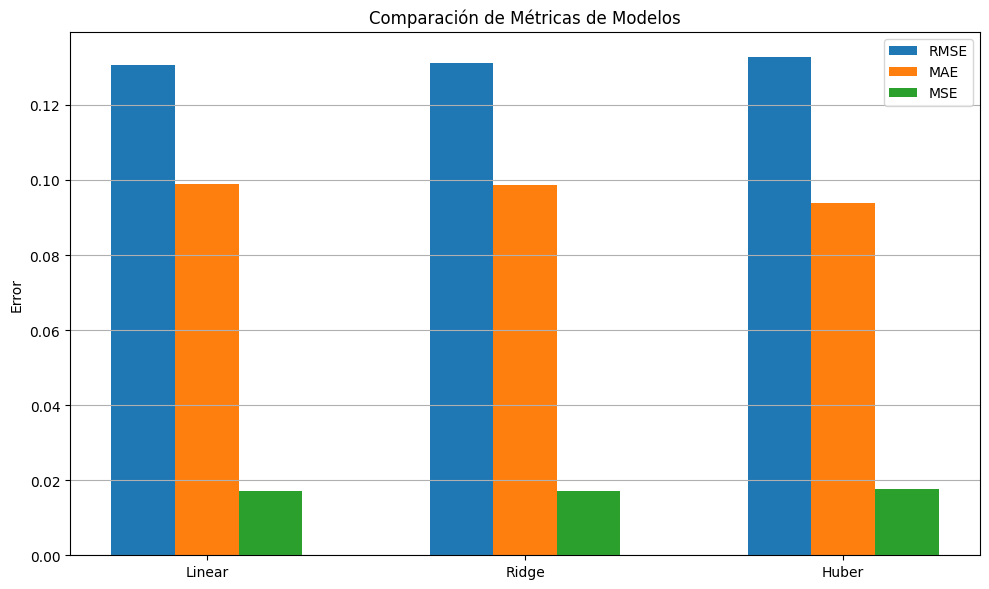

In [79]:
# Crear diccionarios con las métricas ya calculadas
metrics_linear = {
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred)
}

metrics_ridge = {
    "RMSE": root_mean_squared_error(y_test, ridge_pred),
    "MAE": mean_absolute_error(y_test, ridge_pred),
    "MSE": mean_squared_error(y_test, ridge_pred)
}

metrics_huber = {
    "RMSE": root_mean_squared_error(y_test, huber_pred),
    "MAE": mean_absolute_error(y_test, huber_pred),
    "MSE": mean_squared_error(y_test, huber_pred)
}

# Graficar
import matplotlib.pyplot as plt
import numpy as np

models = ["Linear", "Ridge", "Huber"]
bar_width = 0.2
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, [metrics_linear["RMSE"], metrics_ridge["RMSE"], metrics_huber["RMSE"]], width=bar_width, label="RMSE")
plt.bar(x, [metrics_linear["MAE"], metrics_ridge["MAE"], metrics_huber["MAE"]], width=bar_width, label="MAE")
plt.bar(x + bar_width, [metrics_linear["MSE"], metrics_ridge["MSE"], metrics_huber["MSE"]], width=bar_width, label="MSE")

plt.xticks(x, models)
plt.ylabel("Error")
plt.title("Comparación de Métricas de Modelos")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
